<a href="https://colab.research.google.com/github/Ramya-vasantha-babu/Ramya/blob/main/Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk spacy scikit-learn wordcloud
!python -m spacy download en_core_web_sm  # Download the small English model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the data
try:
    df = pd.read_csv('/content/olid-training-v1.0[1].tsv', sep='\t')
except FileNotFoundError:
    print("The file 'olid-training-v1.0.tsv' was not found.  Make sure it is in the correct directory, or specify the full path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Rename columns for easier handling (assuming 'tweet' and 'subtask_a')
df = df.rename(columns={'tweet': 'text', 'subtask_a': 'label'})

# Display the first few rows and some info
print(df.head())
print(df.info())
print(df['label'].value_counts())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


      id                                               text label subtask_b  \
0  86426  @USER She should ask a few native Americans wh...   OFF       UNT   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   OFF       TIN   
2  16820  Amazon is investigating Chinese employees who ...   NOT       NaN   
3  62688  @USER Someone should'veTaken" this piece of sh...   OFF       UNT   
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT       NaN   

  subtask_c  
0       NaN  
1       IND  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   text       13240 non-null  object
 2   label      13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB
None
lab

In [ ]:
# Clean the text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)
print(df['text'].head())

# Preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].map({'OFF': 1, 'NOT': 0})  # Numerical labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0                        She ask native Americans take
1                   Go home youre drunk MAGA Trump URL
2    Amazon investigating Chinese employee selling ...
3             Someone shouldveTaken piece shit volcano
4     Obama wanted liberal amp illegals move red state
Name: text, dtype: object


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (13240, 5000)
Shape of y: (13240,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10592, 5000)
Shape of X_test: (2648, 5000)
Shape of y_train: (10592,)
Shape of y_test: (2648,)


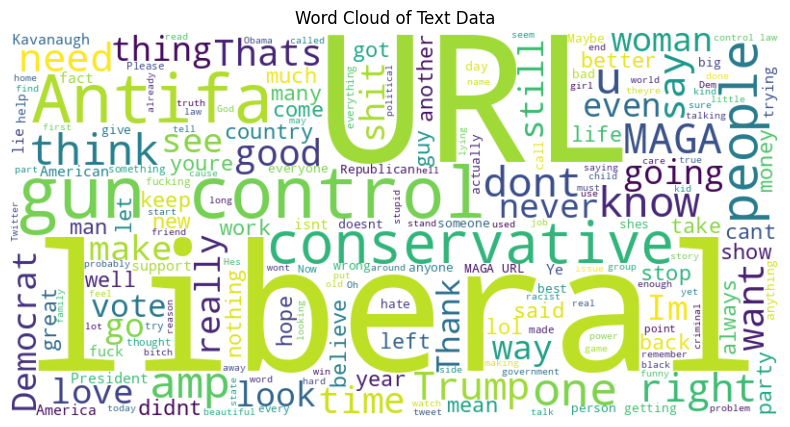

In [ ]:
# Combine all text into a single string
all_text = ' '.join(df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

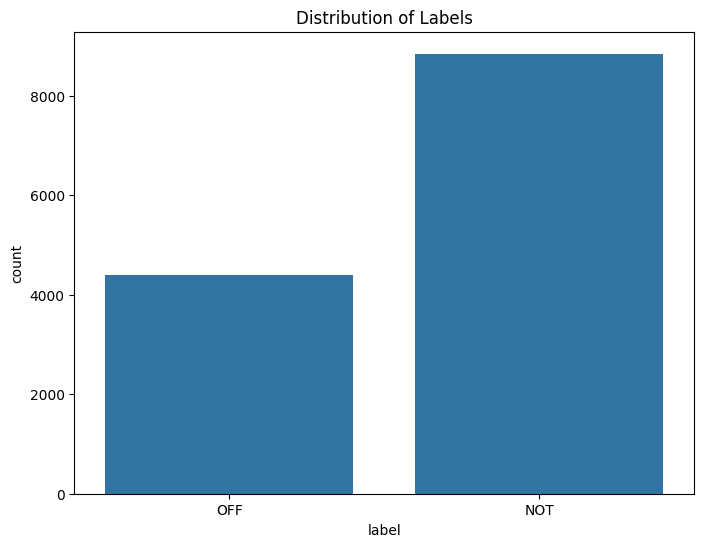

In [ ]:
import seaborn as sns
# Visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

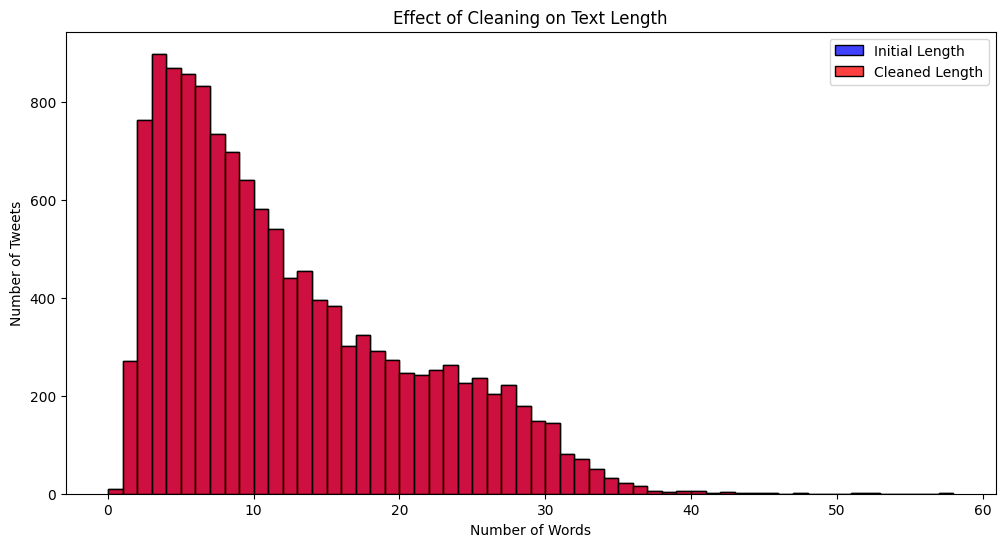

In [ ]:
# Rename columns
df = df.rename(columns={'tweet': 'text', 'subtask_a': 'label'})

# Store initial word counts BEFORE cleaning
df['text_initial_length'] = df['text'].apply(lambda x: len(x.split()))

# 1. Cleaning Function and Visualization
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function
df['text_cleaned'] = df['text'].apply(clean_text)

# Calculate cleaned length
df['text_cleaned_length'] = df['text_cleaned'].apply(lambda x: len(x.split()))

# Visualization: Cleaning Effect
plt.figure(figsize=(12, 6))
sns.histplot(df['text_initial_length'], kde=False, label='Initial Length', color='blue')
sns.histplot(df['text_cleaned_length'], kde=False, label='Cleaned Length', color='red')
plt.title('Effect of Cleaning on Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

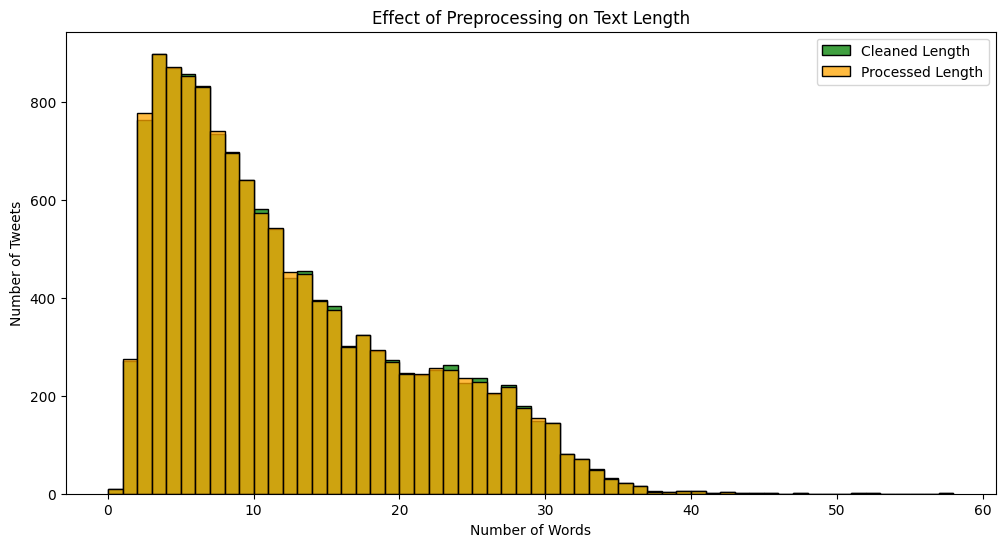

In [ ]:
# 2. Preprocessing Function (Stopwords, Lemmatization)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

# Apply preprocessing function
df['text_processed'] = df['text_cleaned'].apply(preprocess_text)

# Calculate processed length
df['text_processed_length'] = df['text_processed'].apply(lambda x: len(x.split()))

# Visualization: Preprocessing Effect
plt.figure(figsize=(12, 6))
sns.histplot(df['text_cleaned_length'], kde=False, label='Cleaned Length', color='green')
sns.histplot(df['text_processed_length'], kde=False, label='Processed Length', color='orange')
plt.title('Effect of Preprocessing on Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7280966767371602
              precision    recall  f1-score   support

         NOT       0.72      0.97      0.82      1733
         OFF       0.82      0.27      0.41       915

    accuracy                           0.73      2648
   macro avg       0.77      0.62      0.62      2648
weighted avg       0.75      0.73      0.68      2648



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7628398791540786
              precision    recall  f1-score   support

         NOT       0.76      0.93      0.84      1733
         OFF       0.77      0.45      0.57       915

    accuracy                           0.76      2648
   macro avg       0.76      0.69      0.70      2648
weighted avg       0.76      0.76      0.74      2648



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gradient Boosting Machine classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7311178247734139
              precision    recall  f1-score   support

         NOT       0.72      0.96      0.82      1733
         OFF       0.81      0.29      0.43       915

    accuracy                           0.73      2648
   macro avg       0.76      0.63      0.63      2648
weighted avg       0.75      0.73      0.69      2648



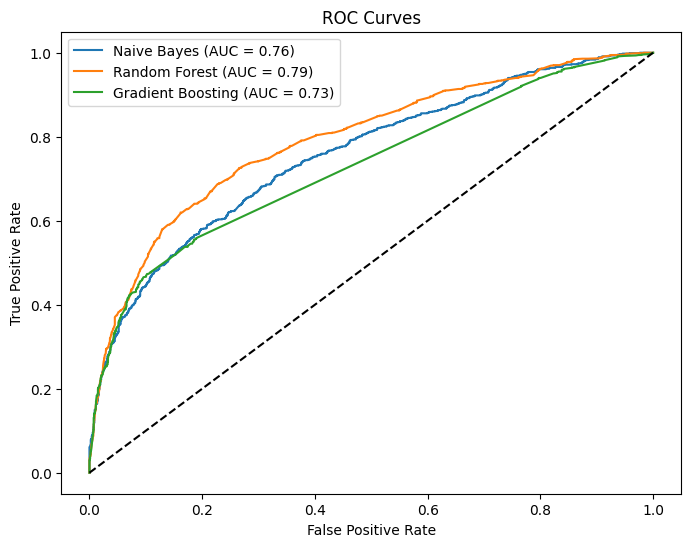

In [ ]:
# 1. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_preds = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_preds, output_dict=True)

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_preds, output_dict=True)

# 3. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_probs = gb_model.predict_proba(X_test)[:, 1]
gb_preds = gb_model.predict(X_test)
gb_report = classification_report(y_test, gb_preds, output_dict=True)

# 1. ROC Curves
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')

fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

fpr, tpr, _ = roc_curve(y_test, gb_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

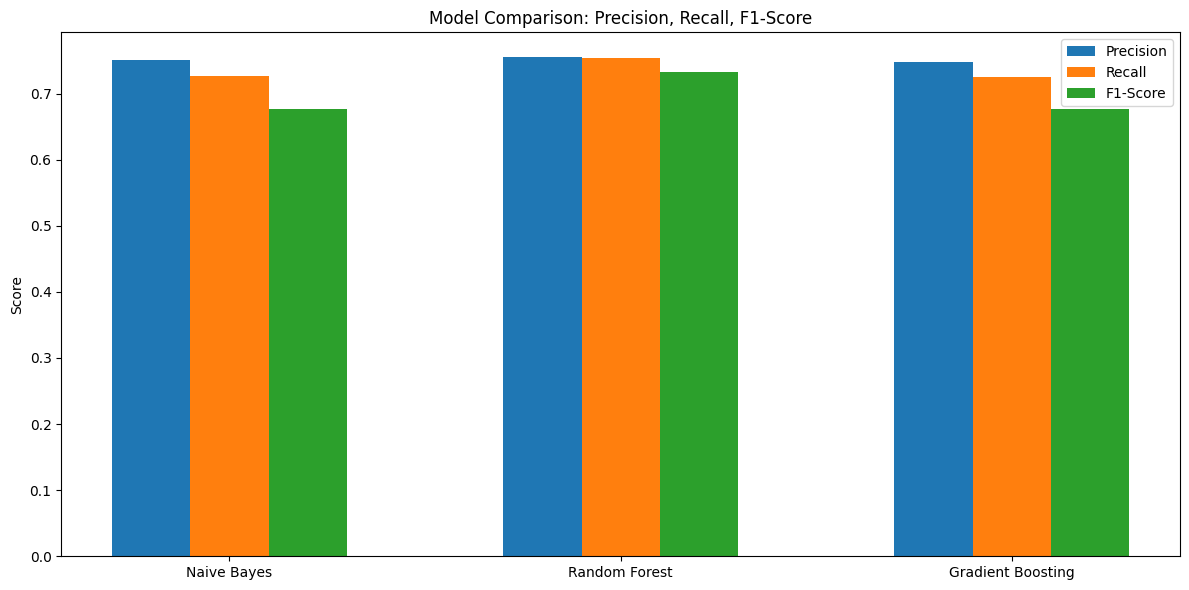

In [ ]:
# 2. Bar Chart: Model Comparison (Precision, Recall, F1-Score)
model_names = ['Naive Bayes', 'Random Forest', 'Gradient Boosting']
precision = [nb_report['weighted avg']['precision'], rf_report['weighted avg']['precision'], gb_report['weighted avg']['precision']]
recall = [nb_report['weighted avg']['recall'], rf_report['weighted avg']['recall'], gb_report['weighted avg']['recall']]
f1_score = [nb_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score'], gb_report['weighted avg']['f1-score']]

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')
plt.xticks(x, model_names)
plt.ylabel('Score')
plt.title('Model Comparison: Precision, Recall, F1-Score')
plt.legend()
plt.tight_layout()
plt.show()

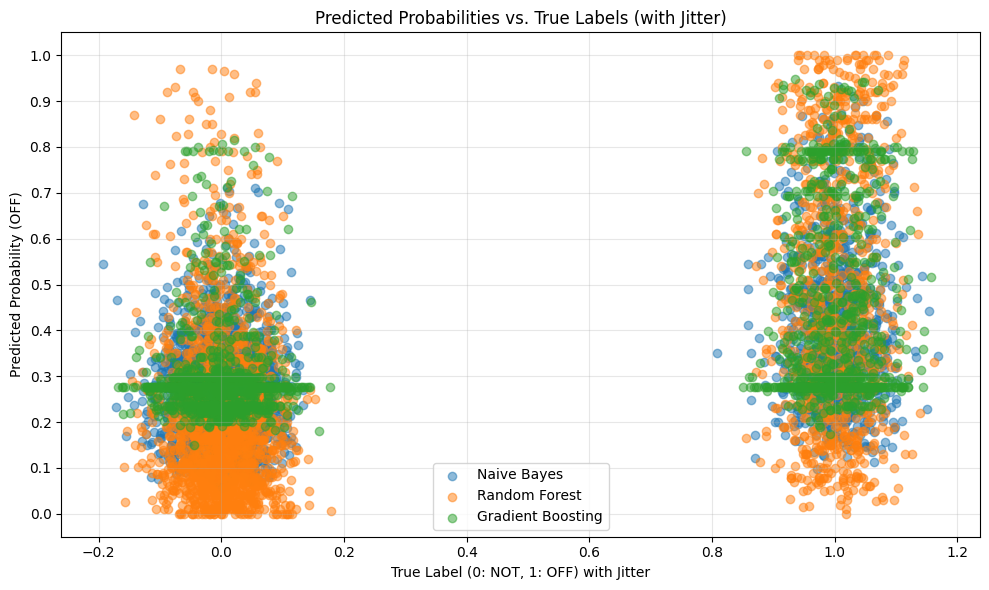

In [ ]:
# 3. Scatter Plot: Predicted Probabilities vs. True Labels (with Jitter)
plt.figure(figsize=(10, 6))
jitter = 0.05  # Add a small amount of jitter to separate points
plt.scatter(y_test + np.random.normal(0, jitter, len(y_test)), nb_probs, label='Naive Bayes', alpha=0.5)
plt.scatter(y_test + np.random.normal(0, jitter, len(y_test)), rf_probs, label='Random Forest', alpha=0.5)
plt.scatter(y_test + np.random.normal(0, jitter, len(y_test)), gb_probs, label='Gradient Boosting', alpha=0.5)
plt.xlabel('True Label (0: NOT, 1: OFF) with Jitter')
plt.ylabel('Predicted Probability (OFF)')
plt.title('Predicted Probabilities vs. True Labels (with Jitter)')
plt.yticks(np.arange(0, 1.1, 0.1))  # Ensure y-axis ranges from 0 to 1
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

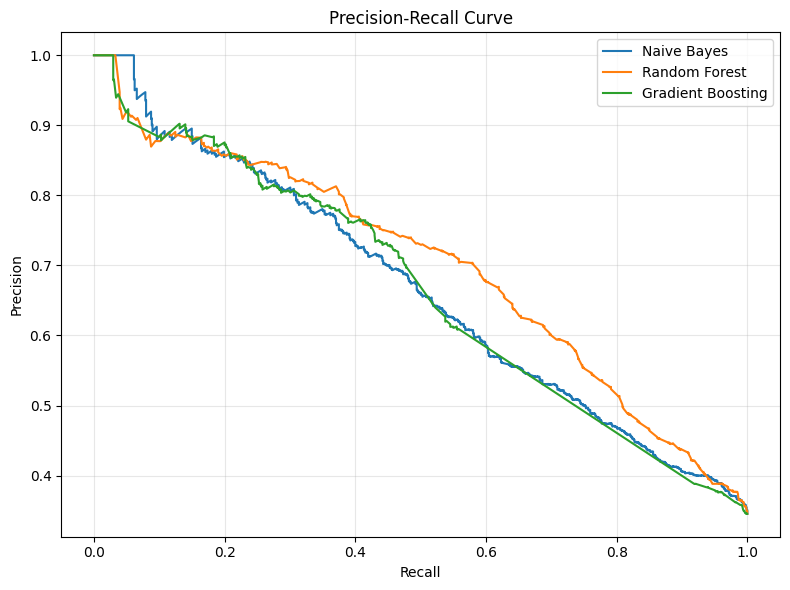

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 4. Line Chart: Precision-Recall Curve
plt.figure(figsize=(8, 6))

precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_probs)
plt.plot(recall_nb, precision_nb, label='Naive Bayes')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
plt.plot(recall_rf, precision_rf, label='Random Forest')

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_probs)
plt.plot(recall_gb, precision_gb, label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
